# Multi-output GPs
## Independent models

In [1]:
%matplotlib inline
import os
import argparse
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

import sys
sys.path.insert( 0, '../')
sys.path.insert( 0, '../abex')
sys.path.insert( 0, '../emukit')
sys.path.insert( 0, '../pyBCKG')

In [2]:
import GPy

In [3]:
import emukit.test_functions.forrester
forrester_fcn, _ = emukit.test_functions.forrester.multi_fidelity_forrester_function()
forrester_fcn_low = forrester_fcn.f[0]
forrester_fcn_high = forrester_fcn.f[1]

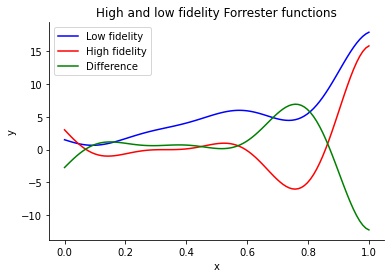

In [4]:
FIG_SIZE = (6, 4)
n_plot_points = 100
x_plot = np.linspace(0, 1, n_plot_points)[:, None]
y_plot_low = forrester_fcn_low(x_plot)
y_plot_high = forrester_fcn_high(x_plot)
y_plot_diff = 0.2*y_plot_low - y_plot_high

plt.figure(figsize=FIG_SIZE)
plt.plot(x_plot, y_plot_low, 'b', label='Low fidelity')
plt.plot(x_plot, y_plot_high, 'r', label='High fidelity')
plt.plot(x_plot, y_plot_diff, 'g', label='Difference')
plt.legend()
plt.title('High and low fidelity Forrester functions')
plt.xlabel('x')
plt.ylabel('y')
sns.despine()